In [2]:
%matplotlib widget
import os
from os.path import join

from tqdm.std import tqdm

import random
import re
from datetime import date
from pathlib import Path
from typing import Union

import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from tqdm import tqdm
from scipy import ndimage
import numpy

import trimesh
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid

In [6]:
mesh_pth = '/media/medical/projects/head_and_neck/onkoi_2019/dissm/onkoi-train/Parotid_L_interp_mesh_simplified_reg_scaled_correspondence_mix-rpm_out/comp_00.obj'
mesh = trimesh.load(mesh_pth)
import open3d as o3d
o_mesh = o3d.io.read_triangle_mesh(mesh_pth)

In [5]:
mesh.show()

In [8]:
%matplotlib widget
o3d.visualization.draw_geometries([o_mesh])

[Open3D WARNING] GLFW Error: X11: The DISPLAY environment variable is missing
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_pointclouds(pointclouds: Union[list, tuple], show_matches=False):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    for pcd in pointclouds:
        pos = ax.scatter(pcd[:,0], pcd[:,1], pcd[:,2], s=1) # marker='o')
    if len(pointclouds) == 2 and show_matches and pointclouds[0].shape[0] == pointclouds[1].shape[0]:
        lines = [[p1, pointclouds[1][enum]] for enum, p1 in enumerate(pointclouds[0])]
        lc = Line3DCollection(lines, colors='k', alpha=0.3)
        ax.add_collection3d(lc)
    plt.show()

In [6]:
ref = trimesh.load('/media/medical/projects/head_and_neck/onkoi_2019/dissm/onkoi-train/Parotid_L_interp_mesh_simplified_reg_scaled_tps-rpm-correspondence/ref.ply').vertices
ref_reg1 = trimesh.load('/media/medical/projects/head_and_neck/onkoi_2019/dissm/onkoi-train/Parotid_L_interp_mesh_simplified_reg_scaled_tps-rpm-correspondence/case_01_OAR_Parotid_L_Y_target_with_correspondence.ply').vertices
# ref_reg2 = trimesh.load('/media/medical/projects/head_and_neck/onkoi_2019/dissm/onkoi-train/Parotid_L_interp_mesh_simplified_reg_scaled_tps-rpm-correspondence/case_02_OAR_Parotid_L.ply').vertices

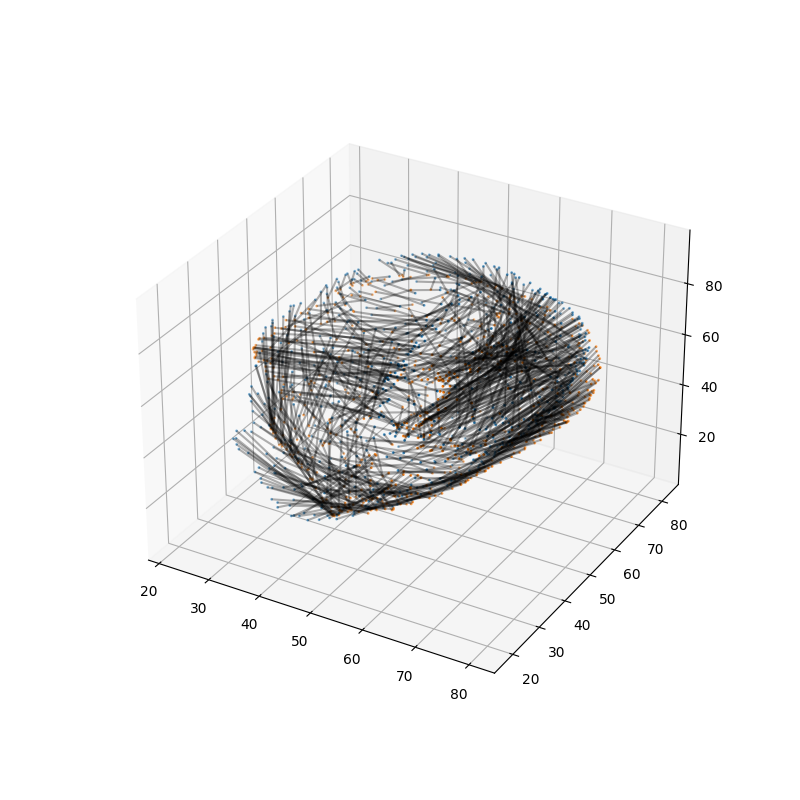

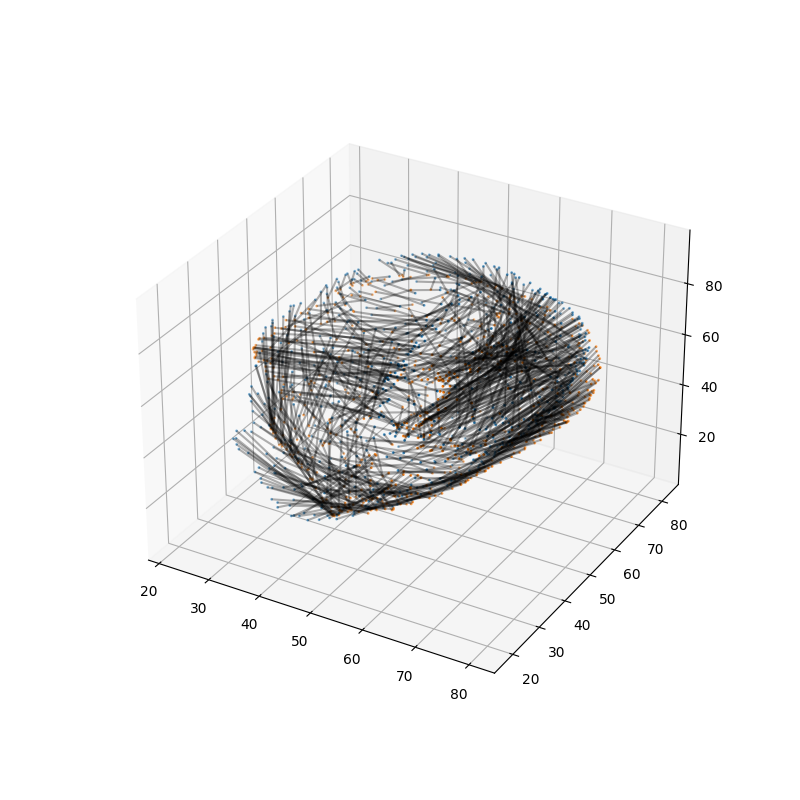

In [8]:
%matplotlib widget
plot_pointclouds([ref[::2,:], ref_reg1[::2,:]], True)
plt.show()